([], <a list of 0 Text yticklabel objects>)

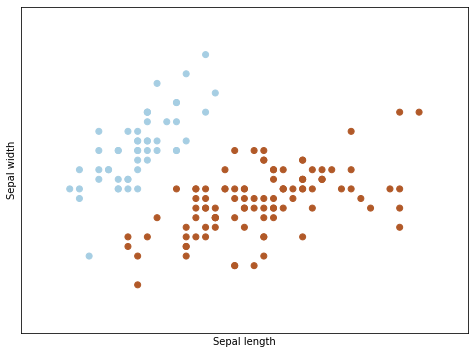

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

for i in range(len(Y)):
    if Y[i]>0:
        Y[i]=1
    else:    
        Y[i]=-1

x1=X[:,0]
x2=X[:,1]
# Plot the training points
plt.scatter(x1,x2, c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [2]:
from sklearn.svm import LinearSVC
clf = LinearSVC()#random_state=0, tol=1e-5)
clf.fit(X,Y)
#print(clf.coef_)
#print(clf.intercept_)
clf.score(X,Y)


0.9933333333333333

([], <a list of 0 Text yticklabel objects>)

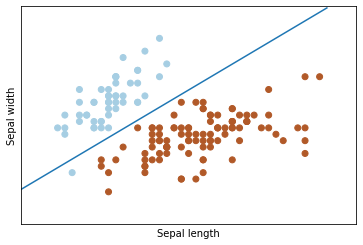

In [3]:
z1=np.linspace(2,8,100).reshape(100,1)

m=clf.coef_[0][0]/clf.coef_[0][1]
l=-m*z1-clf.intercept_/clf.coef_[0][1]

plt.scatter(x1,x2, c=Y, cmap=plt.cm.Paired)
plt.plot(z1,l)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [1]:
import numpy
import cvxopt
from cvxopt import matrix, solvers
P = matrix([[1.0,0],[0.0,1]])
q = matrix([.0,.0])
G = matrix([[.0],[1.0]])
h = matrix([1.0])
A = matrix([1.0,1],(1,2))#原型为cvxopt.matrix(array,dims)，等价于A = matrix([[1.0],[1.0]]）
b = matrix([1.0])
#result=solvers.qp(P,q,A,b)
#print(result['x'])

In [3]:
print(P)

[ 1.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00]



In [5]:
import numpy
import cvxopt
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False  

In [12]:
X1=Y*x1
X1.tolist()
X2=Y*x2
X2.tolist()
P1=matrix([X1.tolist(),X2.tolist()])

P =0.5*P1*P1.T

#len(P1)

q1=-1*np.ones(len(x1))
q2=q1.astype(float)

q=matrix(q1.tolist())

y=Y.astype(float)

A=matrix(y.tolist(),(1,150))
b = matrix([0.0])

G1=-1*matrix(np.eye(150).tolist())
G2=matrix(np.eye(150).tolist())
G=matrix([G1,G2])

c1=0
h1=c1*np.ones(len(x1))
h2=h1.astype(float)
h_1=matrix(h2.tolist())

c2=5
hh1=c2*np.ones(len(x1))
hh2=hh1.astype(float)

h_2=matrix(hh2.tolist())
h=matrix([h_1,h_2])


#print(G)
#h.size

result = solvers.qp(P,q,G,h,A,b)
print(result['x'])

[ 2.84e-09]
[ 1.66e+00]
[ 2.56e-09]
[ 2.64e-09]
[ 1.94e-09]
[ 2.09e-09]
[ 1.55e-09]
[ 2.95e-09]
[ 2.83e-09]
[ 6.59e-09]
[ 3.31e-09]
[ 2.03e-09]
[ 7.17e-09]
[ 1.93e-09]
[ 3.71e-09]
[ 1.44e-09]
[ 2.09e-09]
[ 2.84e-09]
[ 5.42e-09]
[ 1.62e-09]
[ 5.00e+00]
[ 1.89e-09]
[ 1.22e-09]
[ 5.65e-09]
[ 2.03e-09]
[ 5.00e+00]
[ 2.95e-09]
[ 3.61e-09]
[ 5.27e-09]
[ 2.56e-09]
[ 4.43e-09]
[ 5.00e+00]
[ 1.24e-09]
[ 1.50e-09]
[ 6.59e-09]
[ 6.09e-09]
[ 5.00e+00]
[ 1.69e-09]
[ 2.26e-09]
[ 3.79e-09]
[ 2.34e-09]
[ 5.00e+00]
[ 1.61e-09]
[ 2.34e-09]
[ 1.62e-09]
[ 7.17e-09]
[ 1.62e-09]
[ 2.14e-09]
[ 2.65e-09]
[ 3.98e-09]
[ 1.10e-09]
[ 2.23e-09]
[ 1.08e-09]
[ 1.80e-09]
[ 1.14e-09]
[ 3.80e-09]
[ 3.56e-09]
[ 2.78e+00]
[ 1.15e-09]
[ 5.00e+00]
[ 2.29e-09]
[ 4.18e-09]
[ 9.71e-10]
[ 2.07e-09]
[ 1.05e-08]
[ 1.30e-09]
[ 1.94e+00]
[ 2.33e-09]
[ 8.45e-10]
[ 2.20e-09]
[ 1.68e-08]
[ 1.75e-09]
[ 1.01e-09]
[ 1.75e-09]
[ 1.40e-09]
[ 1.28e-09]
[ 8.99e-10]
[ 1.17e-09]
[ 2.46e-09]
[ 2.26e-09]
[ 2.15e-09]
[ 2.15e-09]
[ 2.33e-09]
[ 1.

In [18]:
result['x'].size

(150, 1)

In [17]:
p1=np.argwhere(np.array(result['x'])>0.000001)[0][0]
np.argwhere(np.array(result['x'])>0.000001).size/2

13.0

In [8]:
y*np.array(result['x'])

coef=y.reshape(150,1)*np.array(result['x'])
w1=np.dot(coef.reshape(1,150),x1)
w2=np.dot(coef.reshape(1,150),x2)

In [9]:
r1=Y[1]-w1*x1[1]-w2*x2[1]
r2=Y[41]-w1*x1[41]-w2*x2[41]
r3=Y[106]-w1*x1[106]-w2*x2[106]

In [10]:
[w1,w2,r3]
m=-1*w1/w2
b1=-1*r1/w2
b2=-1*r2/w2
b3=-1*r3/w2

In [11]:
m

array([0.85714286])

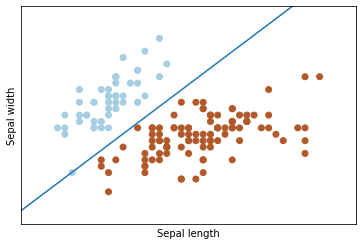

In [11]:
z1=np.linspace(2,8,100).reshape(100,1)

l1=m*z1+b1
l3=m*z1+b3
l2=m*z1+b2

plt.figure()
plt.scatter(x1,x2, c=Y, cmap=plt.cm.Paired)
#plt.scatter(z1,z2, c=yz, cmap=plt.cm.Paired)

plt.plot(z1,l3)
#plt.plot(z1,l2)
#plt.plot(z1,l1)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('linear separeble.png')

In [12]:
# nonlinear svm

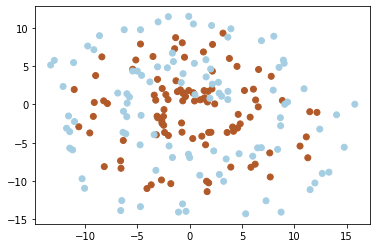

In [22]:
import numpy as np
n=100
a=np.linspace(0,4*np.pi,n)
u0=[a*np.cos(a).tolist(),(a+np.pi)*np.cos(a).tolist()]
u1=np.array(u0).reshape(1,2*n)+np.random.randn(1,2*n)
u=matrix(u1.tolist())

v0=[a*np.sin(a).tolist(),(a+np.pi)*np.sin(a).tolist()]
v1=np.array(v0).reshape(1,2*n)+np.random.randn(1,2*n)
v=matrix(v1.tolist())

x0=matrix([u,v])
x1=np.array(x0).reshape(2,2*n)
x=matrix(x1.tolist())

y1=matrix(np.ones([1,n]).tolist())
y2=(-1)*matrix(np.ones([1,n]).tolist())
y=matrix([y1,y2])


idx=np.where(np.array(y)==1)[0].tolist()
idx1=np.where(np.array(y)==-1)[0].tolist()

plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Paired)


In [14]:
#print(x)
#print(y)
x

<200x2 matrix, tc='d'>

In [23]:
P1=[]
for i in range(2*n):
    for j in range(2*n):
        P1.append(y[i]*y[j]*np.exp(-0.5*((x[i,0]-x[j,0])**2+(x[i,1]-x[j,1])**2)))      


P2=np.array(P1).reshape(2*n,2*n)
P=matrix(P2)
#print(P)

In [24]:
q1=-1*np.ones(2*n)
q2=q1.astype(float)

q=matrix(q1.tolist())

y1=np.array(y).astype(float)

A=matrix(y1.tolist(),(1,2*n))
b = matrix([0.0])

G1=-1*matrix(np.eye(2*n).tolist())
G2=matrix(np.eye(2*n).tolist())
G=matrix([G1,G2])

c1=0
h1=c1*np.ones(2*n)
h2=h1.astype(float)
h_1=matrix(h2.tolist())

c2=5
hh1=c2*np.ones(2*n)
hh2=hh1.astype(float)

h_2=matrix(hh2.tolist())
h=matrix([h_1,h_2])


In [25]:
results = solvers.qp(P,q,G,h,A,b)
#print(results['x'])

In [26]:
p1=np.argwhere(np.array(results['x'])>0.0001)[0][0]
#np.array(result['x']).size
p1

0

In [27]:
a=matrix(results['x'])

In [28]:
b=0

for i in range(2*n):
    b=b+a[i]*y[i]*np.exp(-0.5*((x[i,0]-x[0,0])**2+(x[i,1]-x[0,1])**2))      

b=y[0]-b

print(b)

-0.1995339256290667


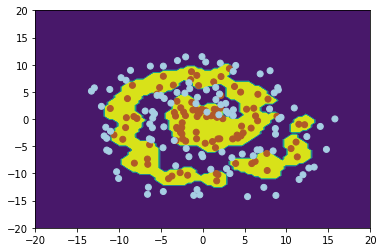

In [29]:
X_1= np.linspace(-20,20,100)
Y_1 = np.linspace(-20,20,100)
X,Y = np.meshgrid(X_1,Y_1)

F=[]
for j in range(100):
    f=0
    for i in range(2*n):
        f=f+a[i]*y[i]*np.exp(-0.5*((x[i,0]-X[j])**2+(x[i,1]-Y[j])**2))      
    f=f+b
    F.append(f)

plt.contourf(X,Y,np.sign(F))
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Paired)
plt.savefig('nonlinear separeble.png')

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import cvxopt
from cvxopt import matrix, solvers
    

# The digits dataset
digits = datasets.load_digits()


In [27]:
images_and_labels = list(zip(digits.images, digits.target))#圖和數字標記
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)
#分出training和test的sample

In [29]:
itemindex0 = np.argwhere(y_train==0)
label0=y_train[itemindex0]
image0=X_train[itemindex0]

itemindex1 = np.argwhere(y_train==2)
label1=y_train[itemindex1]
image1=X_train[itemindex1]


In [30]:
T0=matrix(image0.reshape(len(image0),64).tolist())
T1=matrix(image1.reshape(len(image1),64).tolist())

y1=matrix(np.ones([1,len(image0)]).tolist())
y2=(-1)*matrix(np.ones([1,len(image1)]).tolist())
y=matrix([y1,y2])

T=matrix([T0.T,T1.T])


In [31]:
P1=[]
for i in range(len(image0)+len(image1)):
    for j in range(len(image0)+len(image1)):
        P1.append(y[i]*y[j]*np.exp(-0.0001*(np.linalg.norm(T[i,:]-T[j,:]))**2))      


P2=np.array(P1).reshape(181,181)
P=matrix(P2)
print(P)

[ 1.00e+00  9.45e-01  9.34e-01  9.58e-01  9.54e-01  9.43e-01  9.29e-01 ... ]
[ 9.45e-01  1.00e+00  9.56e-01  9.12e-01  9.57e-01  9.48e-01  9.22e-01 ... ]
[ 9.34e-01  9.56e-01  1.00e+00  9.07e-01  9.59e-01  9.29e-01  9.34e-01 ... ]
[ 9.58e-01  9.12e-01  9.07e-01  1.00e+00  9.41e-01  9.07e-01  8.69e-01 ... ]
[ 9.54e-01  9.57e-01  9.59e-01  9.41e-01  1.00e+00  9.23e-01  9.01e-01 ... ]
[ 9.43e-01  9.48e-01  9.29e-01  9.07e-01  9.23e-01  1.00e+00  9.53e-01 ... ]
[ 9.29e-01  9.22e-01  9.34e-01  8.69e-01  9.01e-01  9.53e-01  1.00e+00 ... ]
[ 9.12e-01  9.43e-01  9.72e-01  8.88e-01  9.47e-01  9.12e-01  9.26e-01 ... ]
[ 9.01e-01  9.11e-01  9.54e-01  8.97e-01  9.32e-01  9.01e-01  9.29e-01 ... ]
[ 9.11e-01  8.72e-01  9.02e-01  8.96e-01  8.80e-01  9.22e-01  9.17e-01 ... ]
[ 9.49e-01  9.10e-01  9.33e-01  9.26e-01  9.22e-01  9.53e-01  9.64e-01 ... ]
[ 8.89e-01  9.04e-01  9.28e-01  8.69e-01  9.08e-01  9.22e-01  9.26e-01 ... ]
[ 9.18e-01  9.36e-01  9.70e-01  9.06e-01  9.55e-01  9.32e-01  9.39e-01 ... ]

In [32]:
q1=-1*np.ones(len(image0)+len(image1))
q2=q1.astype(float)

q=matrix(q1.tolist())

y1=np.array(y).astype(float)

A=matrix(y1.tolist(),(1,len(image0)+len(image1)))
b = matrix([0.0])

G1=-1*matrix(np.eye(len(image0)+len(image1)).tolist())
G2=matrix(np.eye(len(image0)+len(image1)).tolist())
G=matrix([G1,G2])

c1=0
h1=c1*np.ones(len(image0)+len(image1))
h2=h1.astype(float)
h_1=matrix(h2.tolist())

c2=5
hh1=c2*np.ones(len(image0)+len(image1))
hh2=hh1.astype(float)

h_2=matrix(hh2.tolist())
h=matrix([h_1,h_2])


In [33]:
results_digit = solvers.qp(P,q,G,h,A,b)
print(results_digit['x'])

[ 4.44e-08]
[ 7.10e-08]
[ 5.12e-08]
[ 2.77e-08]
[ 8.09e-08]
[ 1.43e-07]
[ 3.06e-05]
[ 9.46e-08]
[ 8.33e-08]
[ 2.44e+00]
[ 8.32e-08]
[ 1.17e-06]
[ 6.61e-08]
[ 7.13e-08]
[ 3.59e-08]
[ 1.85e+00]
[ 2.77e-08]
[ 3.08e-08]
[ 6.70e-08]
[ 1.57e-06]
[ 5.01e-08]
[ 3.69e-08]
[ 4.82e-08]
[ 3.16e-07]
[ 3.95e-08]
[ 4.09e-08]
[ 6.06e-08]
[ 4.57e-08]
[ 1.10e-07]
[ 5.35e-08]
[ 1.94e-07]
[ 1.01e-04]
[ 6.20e-08]
[ 7.04e-08]
[ 8.76e-08]
[ 4.97e-08]
[ 9.53e-08]
[ 4.06e-01]
[ 1.12e-07]
[ 9.78e-08]
[ 2.73e-08]
[ 3.97e-08]
[ 3.35e-08]
[ 5.29e-08]
[ 4.34e-08]
[ 4.92e-08]
[ 7.53e-08]
[ 3.93e-08]
[ 3.54e-08]
[ 2.30e-07]
[ 9.59e-08]
[ 4.88e-08]
[ 5.28e-08]
[ 1.37e+00]
[ 6.95e-08]
[ 4.17e-08]
[ 8.91e-06]
[ 2.16e-07]
[ 5.34e-08]
[ 5.98e-08]
[ 1.18e-07]
[ 3.36e-06]
[ 1.74e-07]
[ 1.66e-01]
[ 4.02e-08]
[ 3.54e-08]
[ 1.41e+00]
[ 3.05e-08]
[ 6.91e-08]
[ 3.44e-08]
[ 4.24e-08]
[ 2.71e+00]
[ 2.60e+00]
[ 4.47e-08]
[ 4.19e-08]
[ 5.09e-08]
[ 6.10e-08]
[ 9.61e-08]
[ 2.18e+00]
[ 3.99e-08]
[ 1.80e-07]
[ 5.15e-08]
[ 3.94e-08]
[ 1.

In [34]:
results_digit['x'].size
p0=np.argwhere(np.array(results_digit['x'])>0.0001)[0][0]
#np.array(result['x']).size
p1=p0.tolist()

In [35]:
a=matrix(results_digit['x'])
a


<181x1 matrix, tc='d'>

In [36]:
a=matrix(results_digit['x'])

b=0

for i in range(len(image0)+len(image1)):
    b=b+a[i]*y[i]*np.exp(-0.0001*(np.linalg.norm(T[i,:]-T[p1,:]))**2)      

b=y[p1]-b

print(b)

-0.5611280569400436


In [37]:
itemindex0 = np.argwhere(y_test==0)
#label0=y_train[itemindex0]
image0_test=X_test[itemindex0]

itemindex1 = np.argwhere(y_test==2)
#label1=y_train[itemindex1]
image1_test=X_test[itemindex1]


In [38]:
t0=matrix(image0_test.reshape(len(image0_test),64).tolist())
t1=matrix(image1_test.reshape(len(image1_test),64).tolist())

y1=matrix(np.ones([1,len(image0_test)]).tolist())
y2=(-1)*matrix(np.ones([1,len(image1_test)]).tolist())
yt=matrix([y1,y2])

t=matrix([t0.T,t1.T])

#plt.matshow(np.array(t1.T[0,:]).reshape(8,8))
#t
#T
t0.size

(64, 88)

In [39]:
F=[]
for j in range(len(image0_test)+len(image1_test)):
    f=0
    for i in range(len(image0)+len(image1)):
        f=f+a[i]*y[i]*np.exp(-0.0001*(np.linalg.norm(T[i,:]-t[j,:]))**2)     
    f=f+b
    F.append(f)

In [40]:
#correct
np.array(np.where(np.sign(F)>0)).size/len(image0_test)

1.0113636363636365

In [48]:
T.size[0]

181

In [41]:
def svm(Image0,Image1,Image0_test,Image1_test):
    import numpy
    import cvxopt
    from cvxopt import matrix, solvers
     
    T0=matrix(Image0.reshape(len(Image0),64).tolist())
    T1=matrix(Image1.reshape(len(Image1),64).tolist())

    y1=matrix(np.ones([1,len(Image0)]).tolist())
    y2=(-1)*matrix(np.ones([1,len(Image1)]).tolist())
    y=matrix([y1,y2])

    T=matrix([T0.T,T1.T])

    t0=matrix(Image0_test.reshape(len(Image0_test),64).tolist())
    t1=matrix(Image1_test.reshape(len(Image1_test),64).tolist())

    y1=matrix(np.ones([1,len(Image0_test)]).tolist())
    y2=(-1)*matrix(np.ones([1,len(Image1_test)]).tolist())
    yt=matrix([y1,y2])

    t=matrix([t0.T,t1.T])

    
    P1=[]
    for i in range(T.size[0]):
        for j in range(T.size[0]):
            P1.append(y[i]*y[j]*np.exp(-0.0001*(np.linalg.norm(T[i,:]-T[j,:]))**2))      

    
    P2=np.array(P1).reshape(T.size[0],T.size[0])
    P=matrix(P2)
    
    q1=-1*np.ones(T.size[0])
    q2=q1.astype(float)
    q=matrix(q1.tolist())
    y1=np.array(y).astype(float)
    A=matrix(y1.tolist(),(1,T.size[0]))
    b = matrix([0.0])

    G1=-1*matrix(np.eye(T.size[0]).tolist())
    G2=matrix(np.eye(T.size[0]).tolist())
    G=matrix([G1,G2])

    c1=0
    h1=c1*np.ones(T.size[0])
    h2=h1.astype(float)
    h_1=matrix(h2.tolist())

    c2=5
    hh1=c2*np.ones(T.size[0])
    hh2=hh1.astype(float)
    h_2=matrix(hh2.tolist())
    h=matrix([h_1,h_2])
    results_digit = solvers.qp(P,q,G,h,A,b)
    
    p0=np.argwhere(np.array(results_digit['x'])>0.0001)[0][0]
    p1=p0.tolist()
    
    a=matrix(results_digit['x'])
    b=0
    for i in range(T.size[0]):
        b=b+a[i]*y[i]*np.exp(-0.0001*(np.linalg.norm(T[i,:]-T[p1,:]))**2)      

    b=y[p1]-b
    
    
    F=[]
    for j in range(t.size[0]):
        f=0
        for i in range(T.size[0]):
            f=f+a[i]*y[i]*np.exp(-0.0001*(np.linalg.norm(T[i,:]-t[j,:]))**2)     
        f=f+b
        F.append(f)
    #correct
    
    return print(1-np.abs((np.array(np.where(np.sign(F)>0)).size-len(Image0_test))/len(Image0_test)))

In [42]:
def Image_data(n):
    itemindexn = np.argwhere(y_train==n)
    imagen=X_train[itemindexn]
    itemindexn = np.argwhere(y_test==n)
    imagen_test=X_test[itemindexn]

    return [imagen,imagen_test]

In [98]:
[image0,image0_test]=Image_data(0)
[image1,image1_test]=Image_data(1)
[image2,image2_test]=Image_data(2)
[image3,image3_test]=Image_data(3)
[image4,image4_test]=Image_data(4)
[image5,image5_test]=Image_data(5)
[image6,image6_test]=Image_data(6)
[image7,image7_test]=Image_data(7)
[image8,image8_test]=Image_data(8)
[image9,image9_test]=Image_data(9)


In [109]:
svm(image3,image4,image3_test,image4_test)
svm(image8,image4,image8_test,image4_test)

     pcost       dcost       gap    pres   dres
 0:  9.5503e+01 -1.7938e+03  4e+03  4e-01  1e-14
 1:  7.9176e+01 -2.1548e+02  3e+02  2e-14  1e-14
 2: -9.5596e-01 -3.4788e+01  3e+01  8e-15  8e-15
 3: -8.1060e+00 -2.1125e+01  1e+01  7e-15  5e-15
 4: -1.2483e+01 -1.8862e+01  6e+00  4e-15  4e-15
 5: -1.3899e+01 -1.7646e+01  4e+00  4e-15  4e-15
 6: -1.5185e+01 -1.6071e+01  9e-01  3e-15  5e-15
 7: -1.5531e+01 -1.5562e+01  3e-02  2e-15  5e-15
 8: -1.5544e+01 -1.5545e+01  6e-04  6e-16  5e-15
 9: -1.5545e+01 -1.5545e+01  1e-05  8e-16  5e-15
Optimal solution found.
0.978021978021978
     pcost       dcost       gap    pres   dres
 0:  1.0900e+02 -2.2603e+03  4e+03  4e-01  1e-14
 1:  8.1161e+01 -3.2145e+02  4e+02  1e-14  2e-14
 2: -7.6338e+00 -9.0412e+01  8e+01  1e-14  1e-14
 3: -2.4798e+01 -5.6328e+01  3e+01  3e-15  8e-15
 4: -3.1824e+01 -4.5992e+01  1e+01  1e-14  8e-15
 5: -3.5695e+01 -4.0068e+01  4e+00  1e-14  8e-15
 6: -3.6966e+01 -3.8166e+01  1e+00  2e-14  8e-15
 7: -3.7426e+01 -3.7474e+01  